# Self learning 
## Clasificación semisupervisada

La clasificación consiste en la asignación de una categoría a un objeto/individuo (o a varios) .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos (o variables medidas) tenemos de estos y 
* cuáles (o cuántas) serían las (posibles) categorias o clases.

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento. Cuando además ya tenemos de antemano muestras no clasificadas y las consideramos en la clasificación lo llamamos **clasificación semisupervisada**

En esta notebook veremos **Clasificación semisupervisada dentro de una imagen**

## Clasificación en imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección de zonas)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

Abordaremos 



### Clasificación **dentro de una imagen**
$\leftrightarrow $ Segmentación

Dividir a la imagen en regiones. Los objetos/muestras a clasificar o agrupar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

### Imágenes:
Cada pixel tiene un vector de datos o características, puede tener una o más (características/datos).

**Ejemplo:** Imagen monocroma-> Un solo dato o valor por pixel

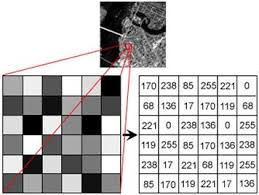



**Ejemplo:** imágenes a color RGB

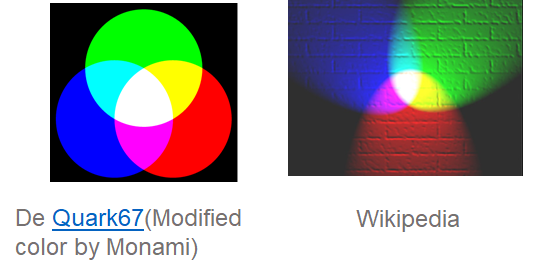

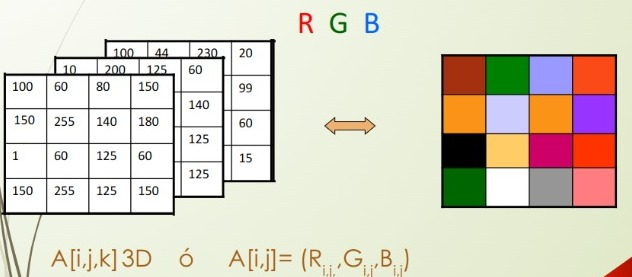

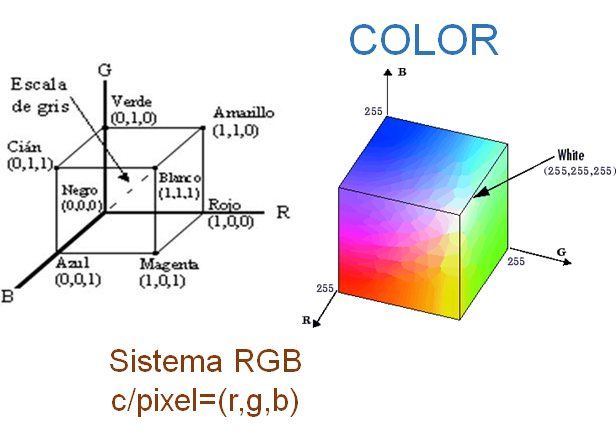

## Ejemplo

Inicializamos el entorno

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

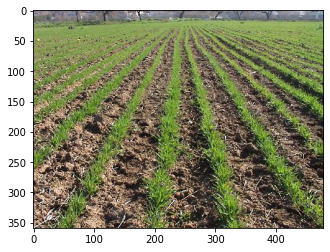

dimensiones de la imagen:  (359, 479, 3) es decir:  359 x 479  pixeles RGB
cantidad de pixeles: 171961


In [4]:
#path='https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/Campo.png'
#path='https://drive.google.com/file/d/1zKmzhRmwpY6lfesQvfhGCXGD8fkcN02p/view?usp=sharing'
#path='/content/sample_data/Campo.png'
path='Campo.png' # pueden cambiarlo con la imagen que quieran
campo_cv=cv2.imread(path)
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv #cv2 lee en orden BGR'
plt.imshow(campo)
plt.show()
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
print('dimensiones de la imagen: ', dims, 'es decir: ', cant_filas,'x',cant_columnas,' pixeles RGB')
print('cantidad de pixeles:', cant_pixeles)

In [5]:
print(' pixel en el lugar(0,0):', campo[0,0,:])
print('componente roja(R) del pixel (0,0):', campo[0,0,0])
print('componente verde(G) del pixel (0,0):', campo[0,0,1])
print('tipo de datos: ', campo.dtype)

 pixel en el lugar(0,0): [186 155 161]
componente roja(R) del pixel (0,0): 186
componente verde(G) del pixel (0,0): 155
tipo de datos:  uint8


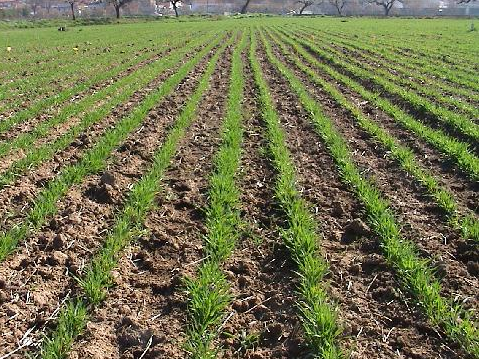

In [6]:
cv2_imshow(campo_cv)

### RGB a Data Frame
**Pasemos los pixeles a Dataframe**
un pixel por fila, desarmamos la espacialidad

In [7]:
data0=np.zeros([cant_pixeles,4],dtype='int')

for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=campo[f,c,:]
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (171961, 4)


,pixel_id,rojo,verde,azul
0,0,186,155,161
1,1,202,171,176
2,2,190,159,165
3,3,203,172,177
4,4,189,160,164


In [8]:
data0=np.zeros([cant_pixeles,4],dtype='int')

data0[:,0]=range(cant_pixeles)
for i in range(1,4):
  data0[:,i]=np.ravel(campo[:,:,i-1])
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (171961, 4)


,pixel_id,rojo,verde,azul
0,0,186,155,161
1,1,202,171,176
2,2,190,159,165
3,3,203,172,177
4,4,189,160,164


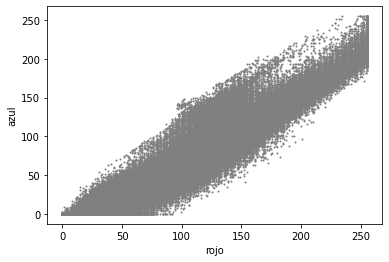

In [49]:
#import matplotlib.patches as mpatches

variables=["rojo","verde","azul"]

variable1=variables[0]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

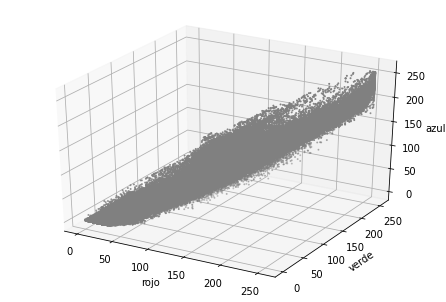

Un caramelo para el que encuentre clusters ahí!!


In [10]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

print('Un caramelo para el que encuentre clusters ahí!!')

**Clustering** k-Medias (No supervisado)

In [11]:
from sklearn.cluster import KMeans
# Número de clusters buscado
n_clust = 3
X=data0[:,1:4]
df_km = pd.DataFrame(X, columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  308738138.28406763


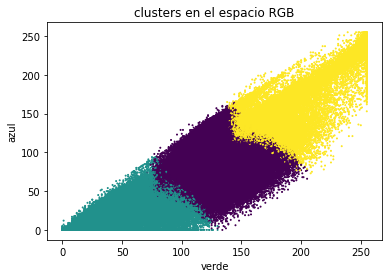

In [12]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

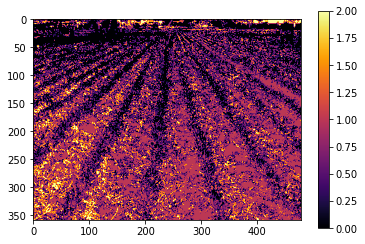

In [51]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters,cmap='inferno')
plt.colorbar()
plt.show()

### Clasificación supervisada-semisupervisada

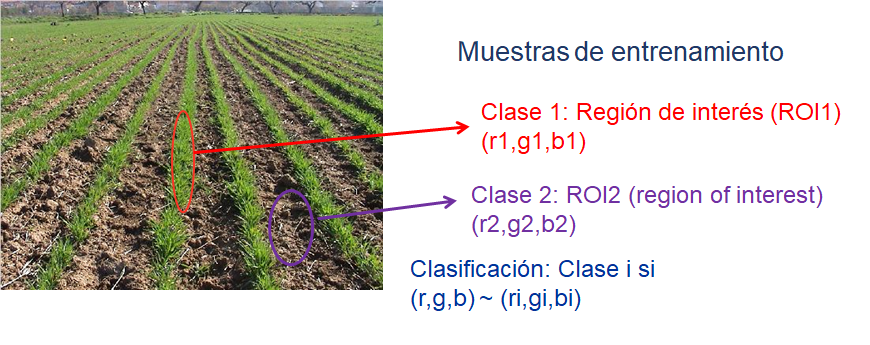

### k-nearest neibours -- k-vecinos más cercanos

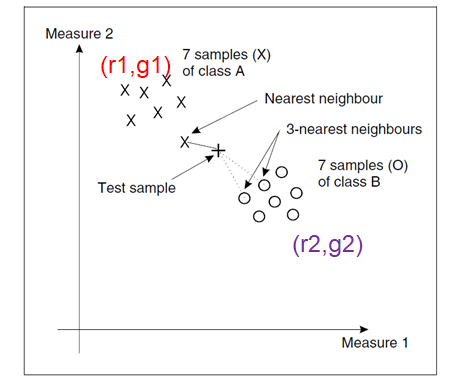

### Semi supervisado: Etiquetado de algunos pixeles: 
**Selección de cada ROI (Region of interest/Regiones de interés)**

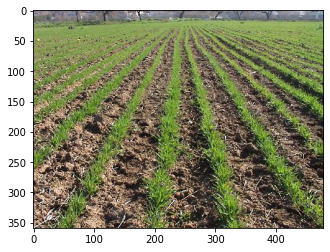

In [14]:
plt.imshow(campo)
plt.show()

Elegimos las regiones de entrenamiento y pueden reemplazarse por el que les sigue

In [15]:
roi1=(136, 241, 47, 106)#suelo
roi2=(192, 269, 33, 56) #pasto
roi3=(145, 1, 121, 14)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')

En cada ROI se guarda: (columna, fila, anchocol, anchofila)


In [16]:
rois=[roi1,roi2,roi3]

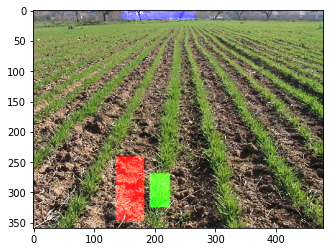

Rosa: suelo, Verde: pasto, Celeste: fondo


In [17]:
campo_rois=campo.copy()

for i in range(3):
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  campo_rois[f1:ff,c1:cf,i]=255

plt.imshow(campo_rois)
plt.show()
print('Rosa: suelo, Verde: pasto, Celeste: fondo')

In [18]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=campo[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()



8524
(8524, 5)
Base de pixeles etiquetados:


,pixel_id,rojo,verde,azul,etiqueta
0,115575,101,104,77,1
1,115576,111,110,90,1
2,115577,104,97,89,1
3,115578,34,26,23,1
4,115579,29,22,16,1


**Graficamos sólo los pixeles etiquetados (roi1,2 y 3: entrenamiento) en el escpacio 3D RGB**

cantidad de muestras etiquetadas: 8524
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


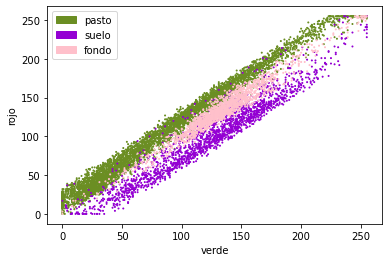

In [19]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

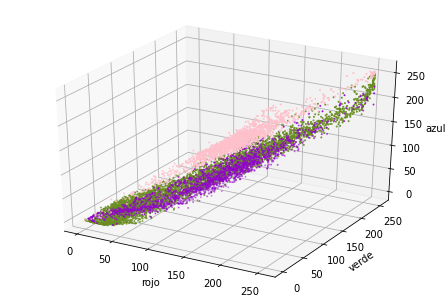

In [20]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0   186    155   161         0
1         1   202    171   176         0
2         2   190    159   165         0
3         3   203    172   177         0
4         4   189    160   164         0
163437
171961
proporción de datos etiqueados: 0.049569379103401354


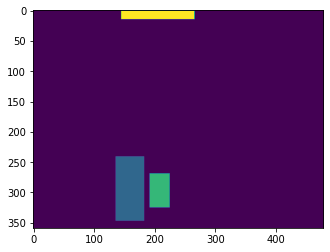

In [21]:
#Base completa con etiquetas y no etiquetados en 0
a=campo.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

**Entrenamos un modelo k-Nearest Neighbor con los pixeles que etiquetamos  (roi1, 2 y 3)** 

con Scikit Learn Elegimos el valor de k=5 (5 vecinos, es un hiper-parámetro)

In [22]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.97


### Clasificación

Clasifiquemos la imagen completa: Se clasifican todos usando el modelo entrenado

In [23]:
X=data0[:,1:4]
y_pred=knn.predict(X)
clasif=y_pred.reshape(cant_filas,cant_columnas)
print(knn.predict([[40, 80, 40]]))

[2]


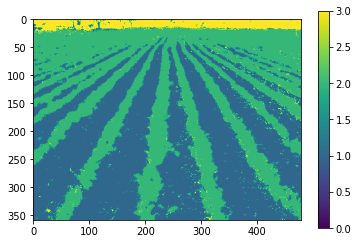

In [24]:
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.colorbar()
plt.show()      

#### Mejora de la clasificación: co-learning/training (Opcional)

Usando conocimiento de dominio: en imágenes, por ejemplo, la información espacial

* Filtro o algoritmo de modas (puede ser iterado)
* Moda: es el valor más repetido

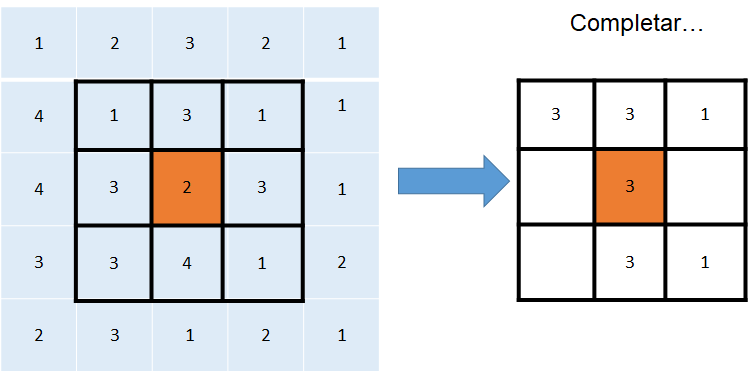

In [25]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)        

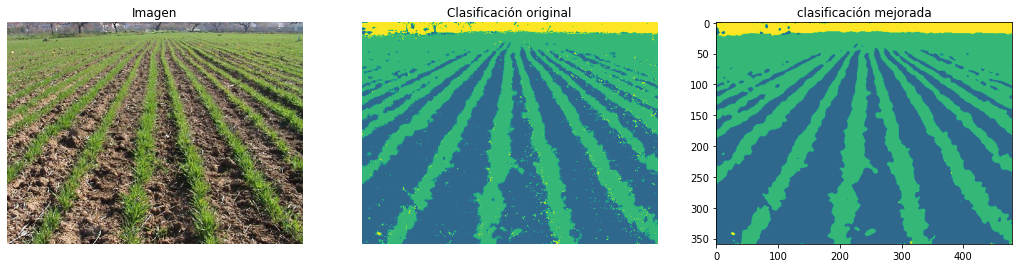

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(campo)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

### Self-learning: Asignación progresiva

**Utilizamos algún criterio para incrementar la muestra de entrenamiento de manera progresiva**

Elegimos comparar 5 vecinos con 16 vecinos más cercanos, si coincide lo agrega a la muestra de entrenamiento. 

In [27]:
props=[]

### Loop 0

In [28]:
##loop 0
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)                

cantidad de no etiquetados, 163437
proporción de datos sin etiquetar: 0.9504306208965987
proporciones: [0.9504306208965987]


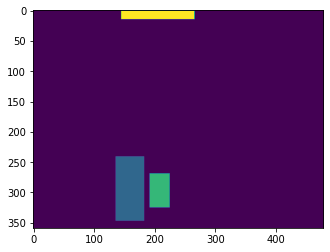

In [29]:
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

### Se definen los dos clasificadores:

In [30]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)

n_neighbors = 16
knn16 = KNeighborsClassifier(n_neighbors)

### Loop 1

 Se entrenan en los lugares etiquetados, se predice con ambos y se buscan coincidencias. Sólo se etiquetan los que coinciden

In [31]:
##loop 1
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])

r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

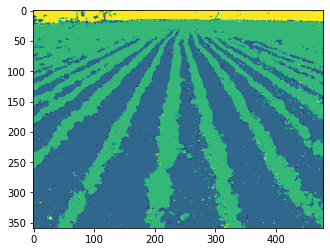

In [32]:
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

Cálculo de los nuevos etiquetados y porcentaje de etiquetados acumulados

In [33]:
##loop 1
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 4835
proporción de datos sin etiquetar: 0.028116840446380284
proporciones: [0.9504306208965987, 0.028116840446380284]


### Loop 2

**Se entrena de nuevo los clasificadores con las muetras de entrenamiento actualizadas** y se usa el mismo criterio para etiquetar nuevos datos

comparar ambos clasificadores (knn 5 vecinos con knn 16 vecinos, en este caso), si coincide lo agrega a la muestra de entrenamiento y así cada loop hasta etiquetar todos o con límite de iteraciones... 

In [34]:
##loop 2
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

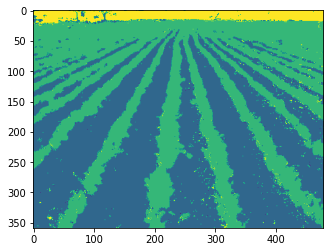

In [35]:
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

In [36]:
##loop 2
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 671
proporción de datos sin etiquetar: 0.003902047557294968
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968]


In [37]:
##loop 3
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

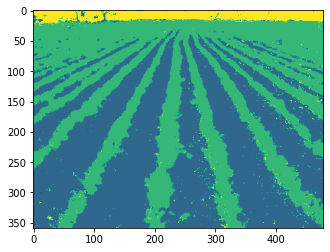

In [38]:
##loop 3
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

In [39]:
##loop 3
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 268
proporción de datos sin etiquetar: 0.0015584929140909857
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857]


In [40]:
##loop 4
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

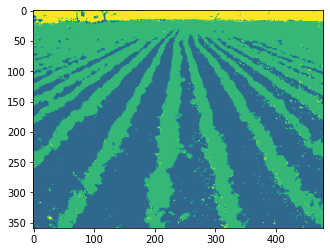

In [41]:
##loop 4
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

In [42]:
##loop 4
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 221
proporción de datos sin etiquetar: 0.0012851751269183128
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128]


In [43]:
##loop 5
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

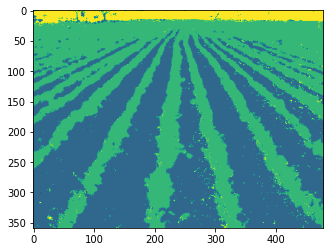

In [44]:
##loop 5
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

In [45]:
##loop 5
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 193
proporción de datos sin etiquetar: 0.0011223475090282099
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128, 0.0011223475090282099]


In [46]:
##loop 6
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

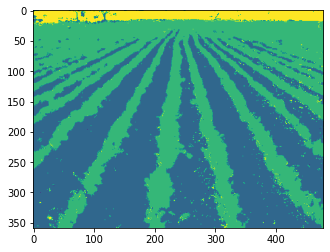

In [47]:
##loop 6
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])   
plt.imshow(clasif_iter)
        

In [48]:
##loop 6
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)        
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 189
proporción de datos sin etiquetar: 0.0010990864207581952
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128, 0.0011223475090282099, 0.0010990864207581952]


**Si no se tuvieron buenos resultados puede ser por muchos motivos:**
* el algoritmo puede fallar y no converger a los aglomerados 
* las características consideradas no son suficientes o no son las adecuadas, por ejemplo.